In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Load the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print('X_train.shape', X_train.shape)

X_train.shape (60000, 28, 28)


In [3]:
# Build the model
i = Input(shape=X_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i,x)

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3309 - accuracy: 0.8943 - val_loss: 0.1132 - val_accuracy: 0.9654
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1058 - accuracy: 0.9682 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9777 - val_loss: 0.0545 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.0580 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0545 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0479 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0331 - accuracy: 0.9905 - val_loss: 0.0428 - val_accuracy:

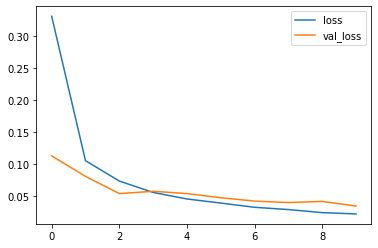

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

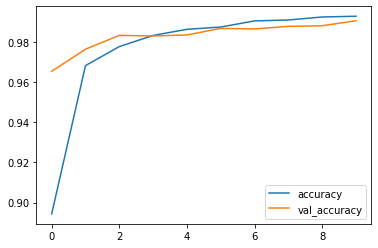

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [8]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix without normalization
[[ 974    0    2    0    0    0    3    1    0    0]
 [   0 1132    0    0    0    0    1    2    0    0]
 [   0    0 1021    3    1    0    0    7    0    0]
 [   0    0    1 1006    0    2    0    1    0    0]
 [   0    0    0    0  974    0    5    0    1    2]
 [   1    1    0    6    0  878    3    1    1    1]
 [   1    2    0    0    1    0  952    0    2    0]
 [   0    2    5    1    3    0    0 1016    0    1]
 [   3    1    1    2    3    1    2    2  956    3]
 [   0    0    0    2    5    1    0    3    1  997]]


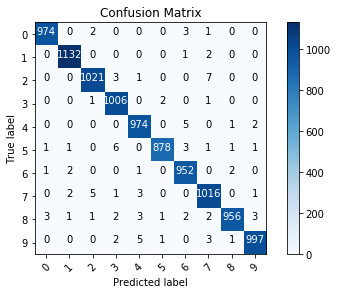

In [9]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

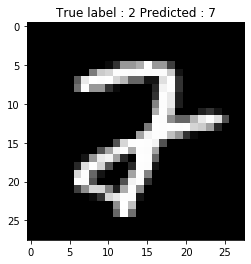

In [10]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(np.squeeze(X_test)[i], cmap='gray')
plt.title('True label : %s Predicted : %s' % (y_test[i], p_test[i]))
plt.show()